<a href="https://colab.research.google.com/github/ge96lip/Quantum-Computing/blob/main/quantum_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!pip install qiskit
!pip install qiskit_aer

In [82]:
!pip install qiskit-ibm-runtime

In [83]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token='11c66369c49ba0a157406e4d2518f9c0cb3b01e79e0c772efa0e28f0c7b1865533d6d734c0040f4b4ba92b37bd450ab51ef6207b7d20b78be979cf6d12e7d222', overwrite=True)

# Load your saved account
service = QiskitRuntimeService()

In [84]:
from qiskit import *

In [85]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circuit = QuantumCircuit(qreg,creg)

In [86]:
%matplotlib inline
circuit.draw()

q20_0: 
       
q20_1: 
       
 c5: 2/

In [87]:
circuit.h(qreg[0])
circuit.cx(qreg[0], qreg[1])

In [88]:
!pip install pylatexenc
circuit.draw()

┌───┐     
q20_0: ┤ H ├──■──
       └───┘┌─┴─┐
q20_1: ─────┤ X ├
            └───┘
 c5: 2/══════════

In [89]:
circuit.measure(qreg, creg)

In [90]:
circuit.draw()

┌───┐     ┌─┐   
q20_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q20_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c5: 2/═══════════╩══╩═
                  0  1

In [91]:
# Create an Aer simulator
from qiskit_aer import AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Run the simulation
job = simulator.run(compiled_circuit)

# Get the results
result = job.result()

In [92]:
from qiskit.visualization import plot_histogram

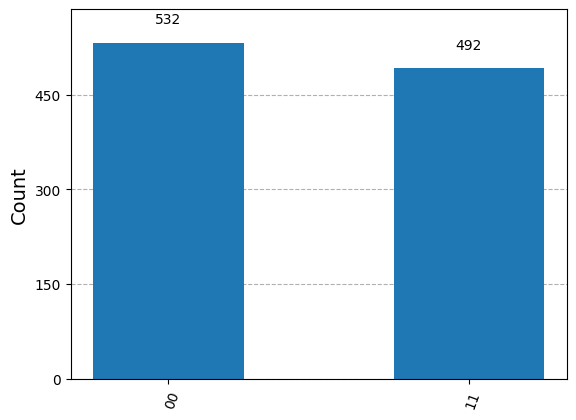

In [93]:
plot_histogram(result.get_counts(circuit))

In [94]:
# List available cloud backends
print('\nCloud backends:')
for backend in service.backends():
    print(backend.name)

from qiskit_aer import Aer
for backend in Aer.backends():
  print(backend)


Cloud backends:
ibm_brisbane
ibm_kyiv
ibm_kyoto
ibm_sherbrooke
AerSimulator('aer_simulator')
AerSimulator('aer_simulator_statevector')
AerSimulator('aer_simulator_density_matrix')
AerSimulator('aer_simulator_stabilizer')
AerSimulator('aer_simulator_matrix_product_state')
AerSimulator('aer_simulator_extended_stabilizer')
AerSimulator('aer_simulator_unitary')
AerSimulator('aer_simulator_superop')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [96]:
backend = service.backend('ibm_sherbrooke')

In [97]:
from qiskit_ibm_runtime import Sampler

transpiled_circuit = transpile(circuit, backend)
sampler = Sampler(backend=backend)
job = sampler.run([transpiled_circuit], shots=1000)

<ipython-input-97-15888394793b>:4: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [98]:
job.result()  # This will wait for the job to complete

# Get the results
result = job.result()

# Plot the histogram
plot_histogram(result.get_counts(circuit))

AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [106]:
print(result)

PrimitiveResult([PubResult(data=DataBin(c5=BitArray(<shape=(), num_shots=1000, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


DataBin(c5=BitArray(<shape=(), num_shots=1000, num_bits=2>))


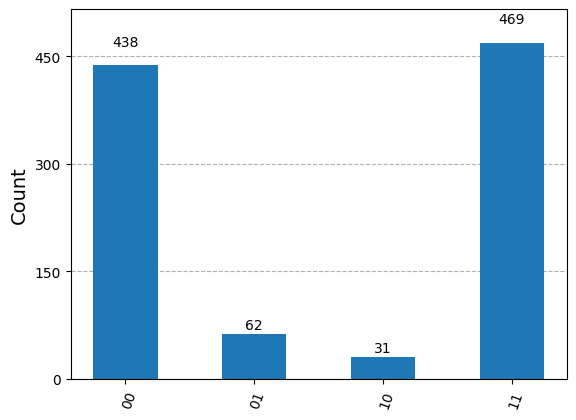

In [118]:
print(result[0].data)
plot_histogram(result[0].data['c5'].get_counts())